<a href="https://colab.research.google.com/github/AndreySuavita/Visualizacion_Actividad_1/blob/master/Activiad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Andrey Fernando Suavita Losada
Google Colab: https://colab.research.google.com/drive/1YyYrg4CEoR7vbYjL28ItB84paJ2wIzX-?usp=sharing

In [41]:
# carga de datos
from google.colab import files

#Importamos modulos
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

In [42]:
# Funcion para cargar los datos
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [43]:
dataFrame = upload_files() 
dataFrame.head()

Saving MEN_ESTADISTICAS_EN_EDUCACION_EN_PREESCOLAR__B_SICA_Y_MEDIA_POR_DEPARTAMENTO.csv to MEN_ESTADISTICAS_EN_EDUCACION_EN_PREESCOLAR__B_SICA_Y_MEDIA_POR_DEPARTAMENTO (1).csv
User uploaded file "MEN_ESTADISTICAS_EN_EDUCACION_EN_PREESCOLAR__B_SICA_Y_MEDIA_POR_DEPARTAMENTO.csv" with length 15889 bytes


,Unnamed: 0,AÑO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,TASA_MATRICULACIÓN_5_16,TAMAÑO_PROMEDIO_DE_GRUPO,SEDES_CONECTADAS_A_INTERNET,APROBACIÓN,DESERCIÓN,REPROBACIÓN,TOTAL_DOCENTES,TOTAL_DOCENTES_3C
0,0,2015,13,Bolivar,88.78,23.02,44.94,91.50,3.01,5.49,15323,Alta cantidad de docentes
1,1,2015,15,Boyaca,83.62,25.17,22.96,93.27,2.22,4.51,10468,Alta cantidad de docentes
2,2,2015,17,Caldas,78.90,25.44,30.69,88.13,3.67,8.20,7266,Medio cantidad de docentes
3,3,2015,18,Caqueta,73.14,22.94,14.77,91.65,4.87,3.48,4442,Baja cantidad de docentes
4,4,2015,19,Cauca,82.21,19.12,44.93,91.64,2.17,6.19,12385,Alta cantidad de docentes


In [45]:
dataFrame.rename(columns={'TOTAL_DOCENTES_3C': 'TD'},inplace=True)

In [46]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   176 non-null    int64  
 1   AÑO                          176 non-null    int64  
 2   CÓDIGO_DEPARTAMENTO          176 non-null    int64  
 3   DEPARTAMENTO                 176 non-null    object 
 4   TASA_MATRICULACIÓN_5_16      176 non-null    float64
 5   TAMAÑO_PROMEDIO_DE_GRUPO     176 non-null    float64
 6   SEDES_CONECTADAS_A_INTERNET  176 non-null    float64
 7   APROBACIÓN                   176 non-null    float64
 8   DESERCIÓN                    176 non-null    float64
 9   REPROBACIÓN                  176 non-null    float64
 10  TOTAL_DOCENTES               176 non-null    int64  
 11  TD                           176 non-null    object 
dtypes: float64(6), int64(4), object(2)
memory usage: 16.6+ KB


Aqui voy

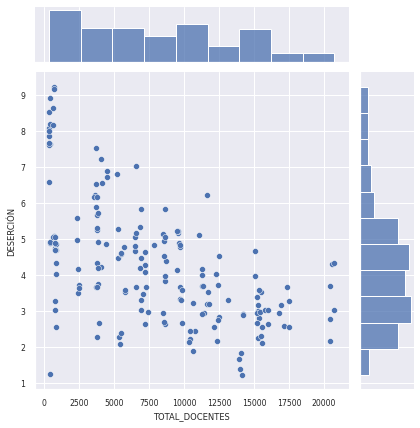

In [54]:
#Distribución cruzada de Edad y Tarifa

sns.jointplot(x='TOTAL_DOCENTES',y='DESERCIÓN',data=dataFrame)

In [49]:
dataFrame2=dataFrame[(dataFrame["AÑO"]==2012) | (dataFrame["AÑO"]==2014) | (dataFrame["AÑO"]==2017)]

In [50]:
dataFrame2.shape

(89, 12)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

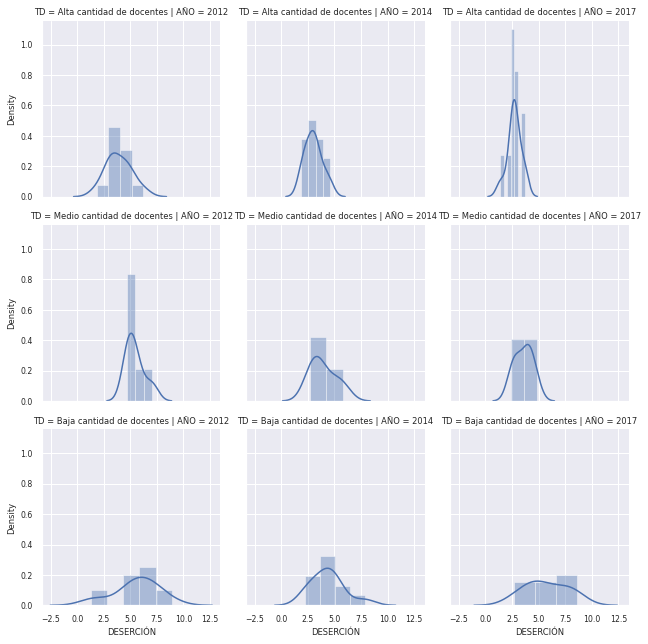

In [56]:
#Cambiamos el font
sns.set(font_scale=0.7)
#FacetGrid - Construir una matriz de gráficos
g = sns.FacetGrid(dataFrame2, row='TD',col='AÑO')
g.map(sns.distplot, "DESERCIÓN")
plt.show()